In [3]:
# See E. Peterfreund, O. Lindenbaum, F. Dietrich, T. Bertalan, M. Gavish, I.G. Kevrekidis and R.R. Coifman,
# "LOCA: LOcal Conformal Autoencoder for standardized data coordinates",
# https://www.pnas.org/doi/full/10.1073/pnas.2014627117
#
#
# -----------------------------------------------------------------------------
# Author: Erez Peterfreund , Ofir Lindenbaum
#         erezpeter@gmail.com  , ofir.lindenbaum@yale.edu , 2020
# 
# This program is free software: you can redistribute it and/or modify it under
# the terms of the GNU General Public License as published by the Free Software
# Foundation, either version 3 of the License, or (at your option) any later
# version.
#
# This program is distributed in the hope that it will be useful, but WITHOUT
# ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS
# FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more
# details.
#
# You should have received a copy of the GNU General Public License along with
# this program.  If not, see <http://www.gnu.org/licenses/>.
# -----------------------------------------------------------------------------

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Loca import *

## Generate data and divide into train and validation


In [5]:
N=1500
cloud_size= 50
d=2
cloud_std=0.001

x= np.random.rand(N,d)
clouds_x= np.expand_dims(x,axis=1)
clouds_x= clouds_x+ np.random.randn(N,cloud_size,d)*cloud_std

def non_linear_function(data):
    new_data = np.zeros(np.shape(data))
    
    new_data[...,0]= data[...,0] + data[...,1]**3
    new_data[...,1]= data[...,1] - data[...,0]**3
    
    return new_data

y=non_linear_function(x)
clouds_y=non_linear_function(clouds_x)


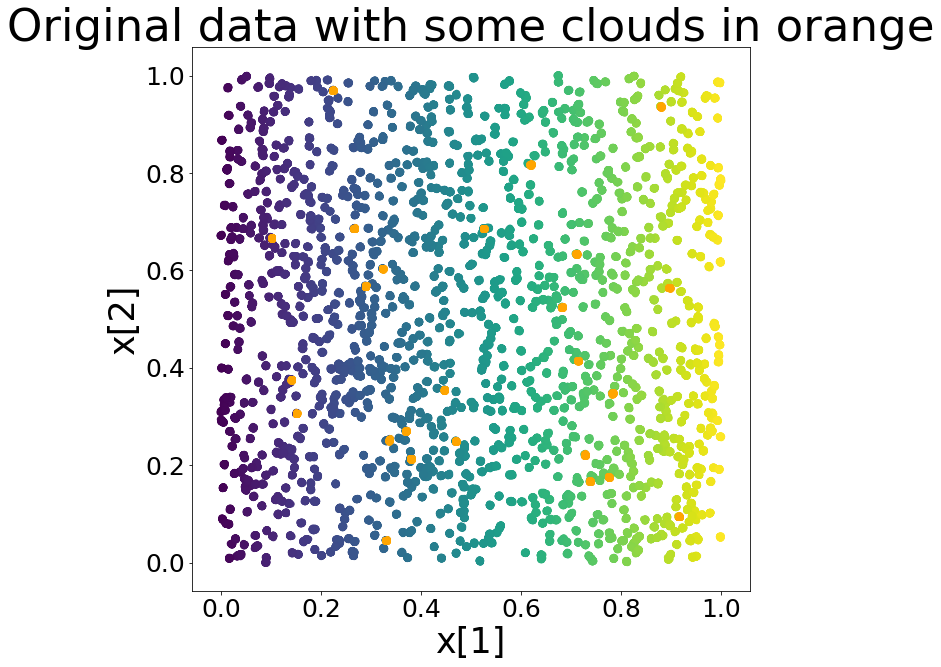

In [6]:
f, ax =plt.subplots(1,1,figsize=(10,10))
ax.scatter(clouds_x[:,:,0].flatten(),clouds_x[:,:,1].flatten(), c= clouds_x[:,:,0].flatten())
ax.set_title('Original data with some clouds in orange',fontsize=45)
ax.set_xlabel('x[1]',fontsize=35)
ax.set_ylabel('x[2]',fontsize=35)
for i in range(0,N,60):
    ax.scatter(clouds_x[i,:,0].flatten(),clouds_x[i,:,1].flatten(), c= 'orange')

plt.tick_params(labelsize=25)


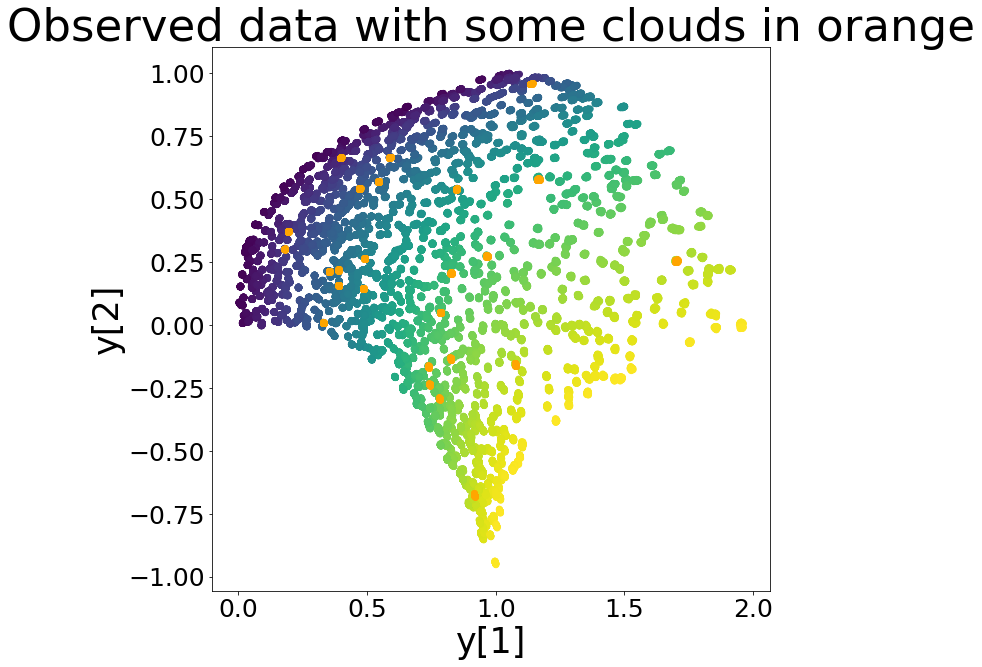

In [7]:
f, ax=  plt.subplots(1,1,figsize=(10,10))

ax.scatter(clouds_y[:,:,0].flatten(),clouds_y[:,:,1].flatten(), c= clouds_x[:,:,0].flatten())
ax.set_title('Observed data with some clouds in orange',fontsize=45)
ax.set_xlabel('y[1]',fontsize=35)
ax.set_ylabel('y[2]',fontsize=35)
for i in range(0,N,60):
    ax.scatter(clouds_y[i,:,0].flatten(),clouds_y[i,:,1].flatten(), c= 'orange')

plt.tick_params(labelsize=25)


## Defining the LOCA parameters

In [8]:
params = {}
params['clouds_var']= cloud_std**2

params['activation_enc']='tanh' # The activation function defined in the encoder
#Options: 'relu'- Relu,   'l_relu'- Leaky Relu,    'sigmoid'-sigmoid,   'tanh'- tanh, 'none'- none
params['activation_dec']='l_relu' # The activation function defined in the decoder

params['encoder_layers']=[2,20,20,2,2] # The amount of neurons in each layer of the encoder 
params['decoder_layers']=[2,20,20,2,2] # The amount of neurons in each layer of the decoder 

model = Loca(**params) 


In [9]:
amount_clouds = clouds_y.shape[0]
prec_train= 0.9
amount_training= int(np.round(amount_clouds*prec_train))

order= np.random.permutation(amount_clouds)

data_train= clouds_y[order[:amount_training],:,:]
data_val= clouds_y[order[:amount_training],:,:]


## Training LOCA

In [10]:
lrs= [5e-3,1e-3,5e-4]
for lr in lrs:
    model.train(data_train, amount_epochs=5000,lr=lr,batch_size=100,data_val= data_val, evaluate_every=100, verbose=True)


InternalError: Blas GEMM launch failed : a.shape=(5000, 2), b.shape=(2, 2), m=5000, n=2, k=2
	 [[Node: layer1/Tensordot/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](layer1/Tensordot/Reshape, layer1/weights/read)]]

Caused by op 'layer1/Tensordot/MatMul', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-eed34dd76d96>", line 11, in <module>
    model = Loca(**params)
  File "/home/erez/Loca/Github/Loca.py", line 189, in __init__
    generateNeuralNet(self)
  File "/home/erez/Loca/Github/Loca.py", line 129, in generateNeuralNet
    amount_layers_created=0)
  File "/home/erez/Loca/Github/Loca.py", line 108, in generateCoder
    layer_out = (tf.tensordot(layer_out, weights,axes=[[-1],[0]]) + biases) # Softmax
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 3004, in tensordot
    ab_matmul = matmul(a_reshape, b_reshape)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 2122, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 4279, in mat_mul
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(5000, 2), b.shape=(2, 2), m=5000, n=2, k=2
	 [[Node: layer1/Tensordot/MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](layer1/Tensordot/Reshape, layer1/weights/read)]]


In [ ]:
# model.load_weights_lowest_val() - Run this function if you stopped the training in the middle

# Examine the LOCA embedding

In [ ]:
embedding, recontruction = model.test(y)

In [ ]:
# Find an affine transformation of data b (of the form f(x)= scalar*R*X+ bias, 
# where R is an orthogonal matrix and bias is a vector) that 
# minimize the least squares problems between the two datasets.
def calibrate_data_b(data_a, data_b):
    if len(np.shape(data_a))!=2 and len(np.shape(data_b))!=2:
        raise Exception('Data should be a 2-d tensor of nxd')
    
    data_a_no_bias= data_a - np.mean(data_a, axis=0)
    data_b_no_bias= data_b - np.mean(data_b, axis=0)
    U,_,VT = np.linalg.svd(np.dot(data_a_no_bias.T, data_b_no_bias))
    
    old_bias= np.mean(data_b, axis=0, keepdims=True)
    new_bias= np.mean(data_a, axis=0, keepdims=True)
    
    R= np.dot(VT.T, U.T)    
    scale_data = np.sum(np.dot(data_b_no_bias,R) * data_a_no_bias) / np.sum(data_b_no_bias**2)
    bias= new_bias- scale_data* np.dot(old_bias,R)
    
    return scale_data, R, bias


scale_data, R, bias = calibrate_data_b(x,embedding)
calibrated_embedding = scale_data*np.dot(embedding,R)+bias


In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:,1], label='original data')
plt.scatter(calibrated_embedding[:,0], calibrated_embedding[:,1], label='embedding')
plt.legend(fontsize=25,markerscale=2)
plt.xlabel('x[1]',fontsize=35)
plt.ylabel('x[2]',fontsize=35)

plt.tick_params(labelsize=25)


In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y[:,0], y[:,1], label='Obsereved data')
plt.scatter(recontruction[:,0], recontruction[:,1], label='Reconstructed data')
plt.legend(fontsize=25,markerscale=2)
plt.xlabel('y[1]',fontsize=35)
plt.ylabel('y[2]',fontsize=35)
plt.tick_params(labelsize=25)


## Examine the LOCA embedding of points in the domain - even if they were not included in the training and validation set

In [ ]:
x_oos = np.random.rand(10000,2)
y_oos= non_linear_function(x_oos)

embedding_oos, recon_oos = model.test(y_oos)
calibrated_oos= scale_data*np.dot(embedding_oos,R)+bias



In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x_oos[::10,0], x_oos[::10,1], label='Original data')
plt.scatter(calibrated_oos[::10,0], calibrated_oos[::10,1], label='Calibrated embedding')
plt.legend(fontsize=25,markerscale=2)
plt.xlabel('x[1]',fontsize=35)
plt.ylabel('x[2]',fontsize=35)

plt.tick_params(labelsize=25)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_oos[::10,0], y_oos[::10,1], label='Obsereved data')
plt.scatter(recon_oos[::10,0], recon_oos[::10,1], label='Reconstructed data')
plt.legend(fontsize=25,markerscale=2)
plt.xlabel('y[1]',fontsize=35)
plt.ylabel('y[2]',fontsize=35)
plt.tick_params(labelsize=25)
